In [65]:
from pgmpy.models import MarkovNetwork
import networkx as nx
import matplotlib.pyplot as plt

model = MarkovNetwork([
    ('A1', 'A2'), 
    ('A1', 'A3'), 
    ('A2', 'A4'), 
    ('A2', 'A5'), 
    ('A3', 'A4'), 
    ('A4', 'A5')
])

cliques = list(nx.find_cliques(model))
print("Clicile modelului sunt:", cliques)


Clicile modelului sunt: [['A4', 'A5', 'A2'], ['A4', 'A3'], ['A1', 'A2'], ['A1', 'A3']]


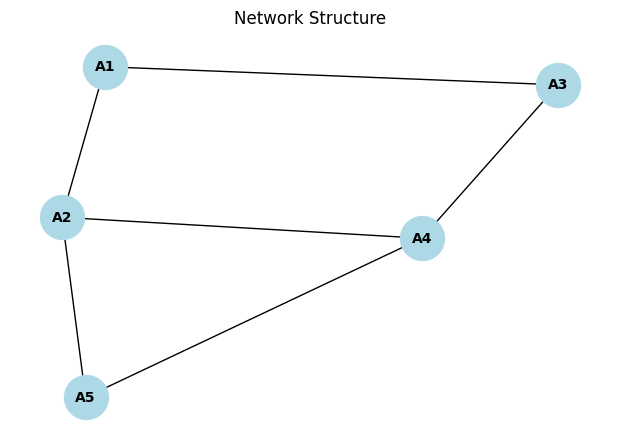

In [66]:
import matplotlib.pyplot as plt
import networkx as nx

graph = nx.DiGraph()
graph.add_edges_from(model.edges())

plt.figure(figsize=(6, 4))
pos = nx.spring_layout(graph) 
nx.draw(graph, pos, with_labels=True, arrows=False, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold')

plt.title('Network Structure')
plt.show()

In [67]:
# Clicile modelului sunt: [['A4', 'A5', 'A2'], ['A4', 'A3'], ['A1', 'A2'], ['A1', 'A3']]

from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation

i1, i2, i3, i4, i5 = 1, 1, 1, 1, 1

# phi (A4, A5, A2) = e ^ i4*A4 + i5*A5 + i2 * A2
phi_A4_A5_A2 = DiscreteFactor(variables=['A4', 'A5', 'A2'], cardinality=[2, 2, 2],
                              values=[np.exp(i4 * 0 + i5 * 0 + i2 * 0), np.exp(i4 * 0 + i5 * 0 + i2 * 1),
                                      np.exp(i4 * 0 + i5 * 1 + i2 * 0), np.exp(i4 * 0 + i5 * 1 + i2 * 1),
                                      np.exp(i4 * 1 + i5 * 0 + i2 * 0), np.exp(i4 * 1 + i5 * 0 + i2 * 1),
                                      np.exp(i4 * 1 + i5 * 1 + i2 * 0), np.exp(i4 * 1 + i5 * 1 + i2 * 1)])


#phi (A1, A2) = e ^ i1*A1 + i2*A2
phi_A1_A2 = DiscreteFactor(variables=['A1', 'A2'], cardinality=[2, 2],
                           values=[np.exp(i1 * 0 + i2 * 0), np.exp(i1 * 0 + i2 * 1),
                                   np.exp(i1 * 1 + i2 * 0), np.exp(i1 * 1 + i2 * 1)])

#phi (A1, A3) = e ^ i1*A1 + i3*A3
phi_A1_A3 = DiscreteFactor(variables=['A1', 'A3'], cardinality=[2, 2],
                           values=[np.exp(i1 * 0 + i3 * 0), np.exp(i1 * 0 + i3 * 1),
                                   np.exp(i1 * 1 + i3 * 0), np.exp(i1 * 1 + i3 * 1)])

#phi (A4, A3) = e ^ i4*A4 + i3*A3
phi_A4_A3 = DiscreteFactor(variables=['A4', 'A3'], cardinality=[2, 2],
                           values=[np.exp(i4 * 0 + i3 * 0), np.exp(i4 * 0 + i3 * 1),
                                   np.exp(i4 * 1 + i3 * 0), np.exp(i4 * 1 + i3 * 1)])

model.add_factors(phi_A1_A2, phi_A1_A3, phi_A4_A5_A2, phi_A4_A3)

inference = BeliefPropagation(model)

max_prob_state = inference.map_query(variables=['A1', 'A2', 'A3', 'A4', 'A5'])
print("Stările de probabilitate maximă:", max_prob_state)



Stările de probabilitate maximă: {'A1': 1, 'A2': 1, 'A3': 1, 'A4': 1, 'A5': 1}


In [68]:
from itertools import product

def clique_energy(state):
    A1, A2, A3, A4, A5 = state
    energy = 0
    
    # phi (A4, A5, A2)
    energy += np.exp(i4 * A4 + i5 * A5 + i2 * A2)
    
    # phi (A1, A2)
    energy += np.exp(i1 * A1 + i2 * A2)
    
    # phi (A1, A3)
    energy += np.exp(i1 * A1 + i3 * A3)
    
    # phi (A4, A3)
    energy += np.exp(i4 * A4 + i3 * A3)

    return energy


joint_probabilities = {}
Z = 0

# Combinarea tuturor valorilor posibile (0, 1) pentru cele 5 variabile
for state in product([0, 1], repeat=5):
    energy = clique_energy(state)
    joint_probabilities[state] = energy
    Z += energy
    
for state in joint_probabilities:
    joint_probabilities[state] /= Z

print("Probabilitățile comune ale variabilelor:")
for state, prob in joint_probabilities.items():
    print(f"Starea {state}: probabilitate {prob}")

Probabilitățile comune ale variabilelor:
Starea (0, 0, 0, 0, 0): probabilitate 0.007442620969964401
Starea (0, 0, 0, 0, 1): probabilitate 0.010639751062163916
Starea (0, 0, 0, 1, 0): probabilitate 0.01383688115436343
Starea (0, 0, 0, 1, 1): probabilitate 0.02252758178720897
Starea (0, 0, 1, 0, 0): probabilitate 0.01383688115436343
Starea (0, 0, 1, 0, 1): probabilitate 0.01703401124656295
Starea (0, 0, 1, 1, 0): probabilitate 0.025724711879408488
Starea (0, 0, 1, 1, 1): probabilitate 0.03441541251225402
Starea (0, 1, 0, 0, 0): probabilitate 0.013836881154363432
Starea (0, 1, 0, 0, 1): probabilitate 0.02252758178720897
Starea (0, 1, 0, 1, 0): probabilitate 0.025724711879408484
Starea (0, 1, 0, 1, 1): probabilitate 0.04934848548625003
Starea (0, 1, 1, 0, 0): probabilitate 0.020231141338762464
Starea (0, 1, 1, 0, 1): probabilitate 0.028921841971608
Starea (0, 1, 1, 1, 0): probabilitate 0.037612542604453535
Starea (0, 1, 1, 1, 1): probabilitate 0.061236316211295085
Starea (1, 0, 0, 0, 0): p